In [1]:
import pandas as pd
from pathlib import Path
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

DATA_ROOT = Path.home() / "Library" / "CloudStorage" / "OneDrive-DanmarksTekniskeUniversitet" / "Virk2Vec" / "data"

### Setting up: Bankruptcy ground truth

In [2]:
# load data 
registration_folder = DATA_ROOT / "Tables" / "Registrations"
registration_files = [file for file in os.listdir(registration_folder) if file.endswith('.csv')]
registrations = pd.concat([pd.read_csv(os.path.join(registration_folder, file), index_col=0) for file in registration_files])

# filter status data
targets_all = ['UNDER KONKURS', "TVANGSOPLØST", "OPLØST EFTER KONKURS"]
registrations = registrations.loc[registrations.ChangeType == 'Status']
registrations = registrations.loc[registrations.NewValue.isin(targets_all)]

tvang_registrations = registrations.loc[registrations.NewValue.isin(["UNDER KONKURS"])][['CVR', 'FromDate', 'NewValue']]
u_konkurs_registrations = registrations.loc[registrations.NewValue.isin(["TVANGSOPLØST"])][['CVR', 'FromDate', 'NewValue']]

In [3]:
# assert no intersection between the two status types on CVR. 
intersect = set(tvang_registrations.CVR).intersection(set(u_konkurs_registrations.CVR))
df_bankrupt = pd.concat([tvang_registrations, u_konkurs_registrations]).sort_values('FromDate', ascending=True).drop_duplicates('CVR', keep='first')

# add the opløst efter konkurs
rest = registrations.loc[~registrations.CVR.isin(df_bankrupt.CVR)]
print(len(rest))
rest = rest.loc[rest.NewValue.isin(["OPLØST EFTER KONKURS"])]
print(len(rest))

df_bankrupt = pd.concat([df_bankrupt, rest[['CVR', 'FromDate', 'NewValue']]]).rename(columns={'FromDate': 'bankrupt_date', 'NewValue': 'bankrupt_type'})

21
21


### Setting up: Financial data

In [4]:
finance_folder = DATA_ROOT / "Tables" / "Financials"
finance_files = [file for file in os.listdir(finance_folder) if file.endswith('.csv')]
financials_all = pd.concat([pd.read_csv(os.path.join(finance_folder, file), index_col=0) for file in finance_files])

# merge with bankrupt data
financials_all['PublicationYear'] = financials_all['PublicationDate'].str[:4].astype(int)
financials_all = financials_all.merge(df_bankrupt, left_on='CVR', right_on='CVR', how='left')
financials_all['BankruptYear'] = pd.to_numeric(financials_all.bankrupt_date.str[:4], errors='coerce')
financials_all['bankrupt_type'] = financials_all['bankrupt_type'].fillna('NOT BANKRUPT')


In [5]:
# format columns
financials_all['EmployeeBenefitsExpense'] = financials_all['EmployeeBenefitsExpense'].abs()
financials_all['ProfitLoss'] = pd.to_numeric(financials_all['ProfitLoss'], errors='coerce')

# filter out outliers in profitloss
financials_all = financials_all.loc[financials_all['ProfitLoss'] < 1e21]


financials_bankrupt = financials_all.loc[~financials_all['BankruptYear'].isna()]
financials_bankrupt = financials_bankrupt.loc[financials_bankrupt['BankruptYear'] > 2013]
financials_bankrupt['YearsToBankruptcy'] = financials_bankrupt['PublicationYear'] - financials_bankrupt['BankruptYear']



### **Viz 1**: Distribution of mean keys of bankrupt vs non-bankrupt companies


/Users/nikolaibeckjensen/Company2Vec/myenv2/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


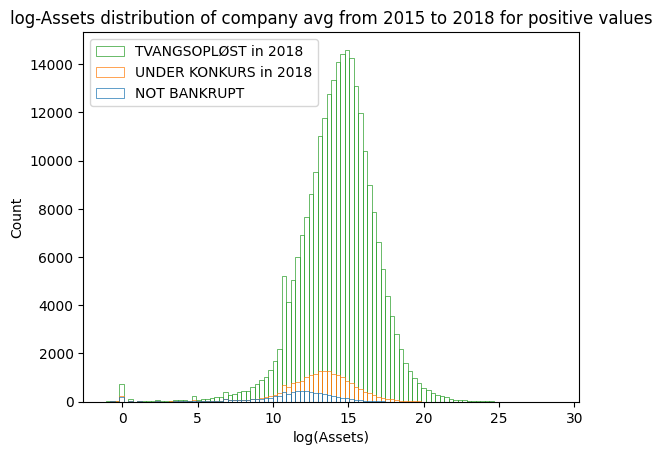

/Users/nikolaibeckjensen/Company2Vec/myenv2/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_14554/2923003700.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  financials_year_positive[key] = np.log(financials_year_positive[key])
/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_14554/2923003700.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

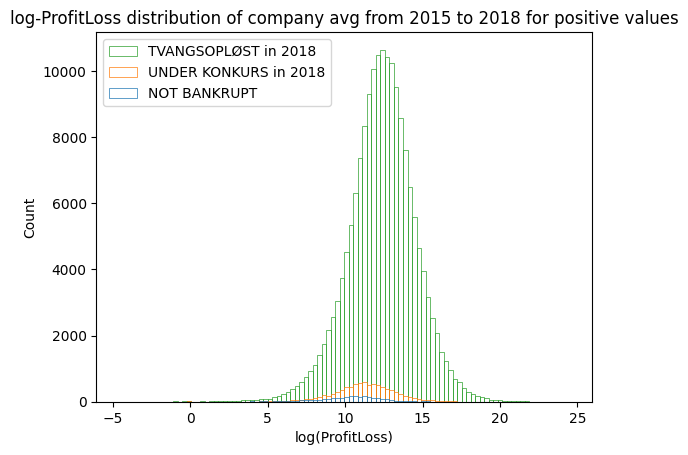

/Users/nikolaibeckjensen/Company2Vec/myenv2/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_14554/2923003700.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  financials_year_positive[key] = np.log(financials_year_positive[key])
/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_14554/2923003700.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

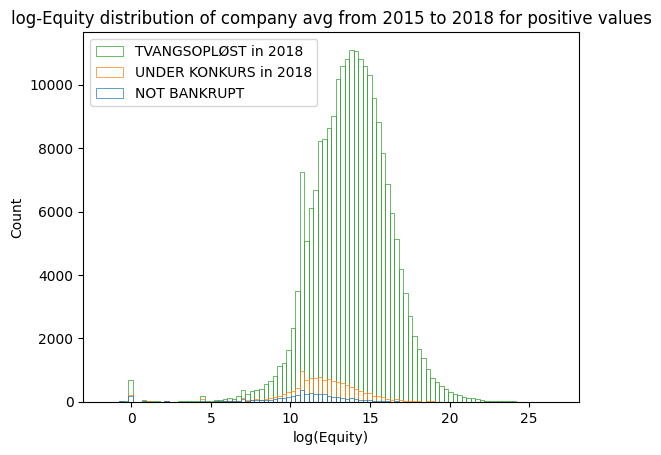

/Users/nikolaibeckjensen/Company2Vec/myenv2/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_14554/2923003700.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  financials_year_positive[key] = np.log(financials_year_positive[key])
/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_14554/2923003700.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

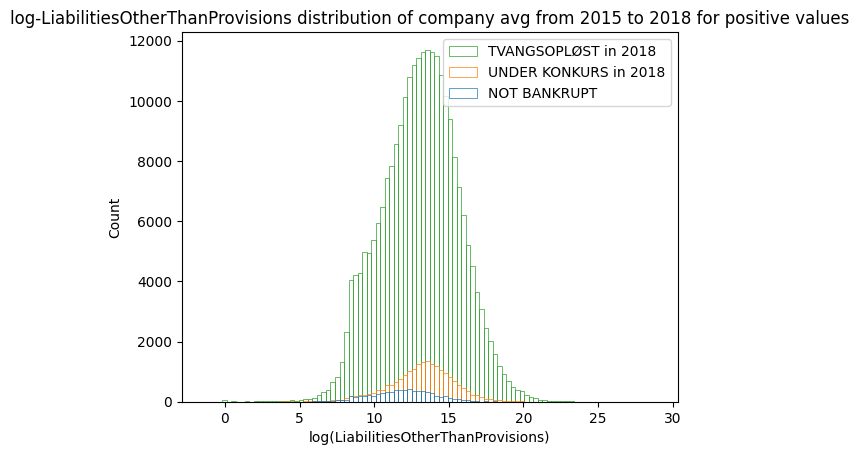

In [21]:
# plot distribution of Assets for bankrupt and non-bankrupt companies

year = 2018
lookback = 3

for key in ['Assets', 'ProfitLoss', 'Equity', 'LiabilitiesOtherThanProvisions']:

    financials_year = financials_all.loc[(financials_all['PublicationYear'] <= year) & (financials_all['PublicationYear'] > year - lookback)]
    financials_year = financials_year[["CVR", "bankrupt_type", key]].dropna(subset=key).groupby(["CVR","bankrupt_type"]).mean()
    
    # split into positive and negatives for better visualization
    financials_year_positive = financials_year.loc[financials_year[key] >= 0] 
    financials_year_positive[key] = np.log(financials_year_positive[key])
    financials_year_negative = financials_year.loc[financials_year[key] < 0]
    financials_year_negative[key] = np.log(financials_year_negative[key] + np.abs(financials_year_negative[key].min()))

    for data, sign in zip([financials_year_positive, financials_year_negative], ['positive', 'negative']):
        if sign == 'negative':
            continue
        sns.histplot(data=data, x=key, hue='bankrupt_type', bins=100, hue_order=['TVANGSOPLØST', 'UNDER KONKURS', 'NOT BANKRUPT'], fill=False)
        plt.title(f'log-{key} distribution of company avg from {year-lookback} to {year} for {sign} values')
        plt.xlabel(f'log({key})')
        plt.legend([f'TVANGSOPLØST in {year}', f'UNDER KONKURS in {year}','NOT BANKRUPT'])
        plt.show()



### **Viz 2**: Distribution of changes in keys of bankrupt vs non-bankrupt companies

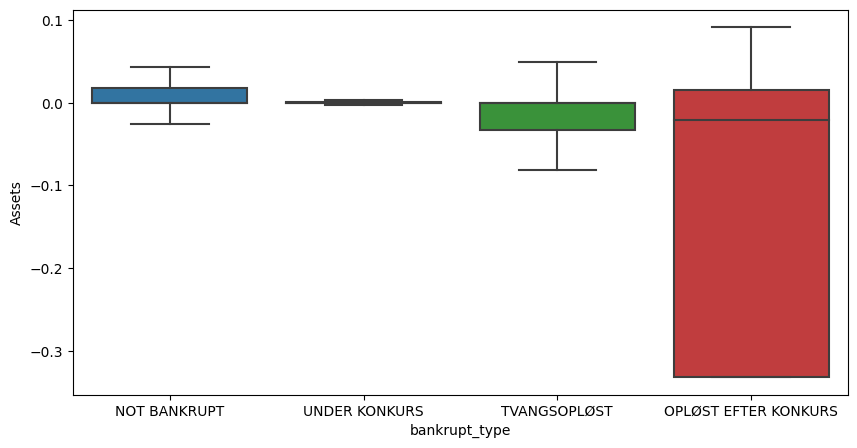

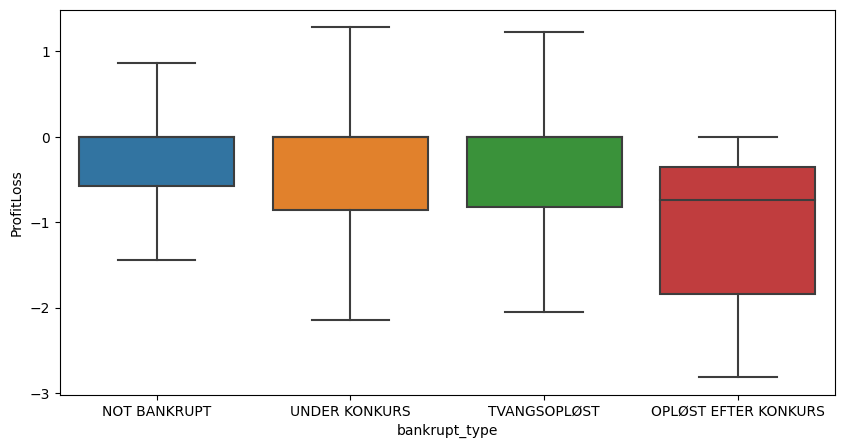

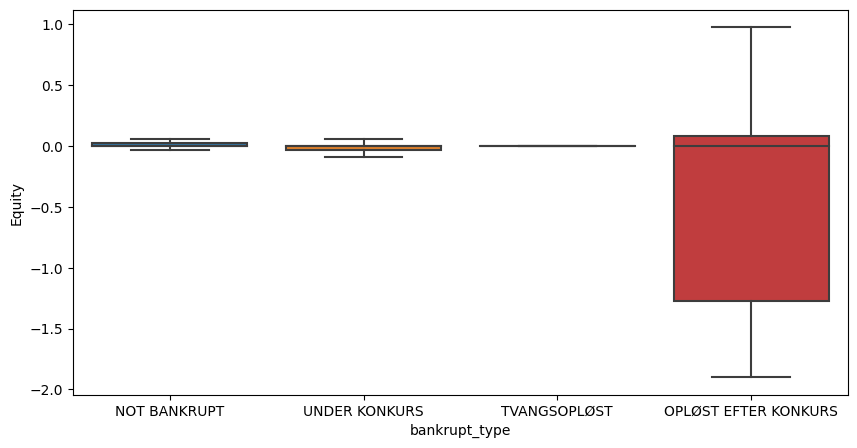

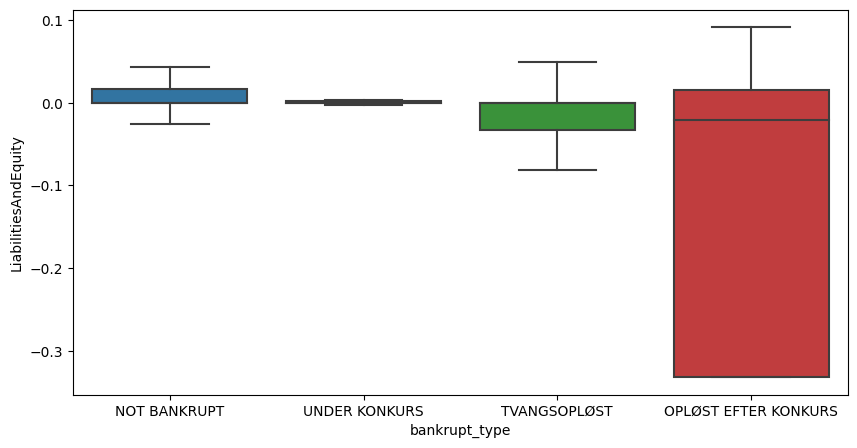

In [7]:
year = 2018
lookback = 3

def percent_change(x: pd.Series):
    diff = x.iloc[-1] - x.iloc[0]
    return diff / x.iloc[0]

for key in ['Assets', 'ProfitLoss', 'Equity', 'LiabilitiesAndEquity']:

    financials_year = financials_all.loc[(financials_all['PublicationYear'] <= year) & (financials_all['PublicationYear'] > year - lookback)].sort_values('PublicationYear', ascending=True)

    # show only companies with at least 3 years of financial data
    companies_with_data = financials_year.groupby('CVR').size()
    companies_with_data = companies_with_data.loc[companies_with_data <= 2].index
    financials_year = financials_year.loc[financials_year.CVR.isin(companies_with_data)]

    # remove companies where the key was 0 in the first year
    companies_with0_first_entry = financials_year.drop_duplicates(['CVR'], keep='first')
    companies_with0_first_entry = companies_with0_first_entry.loc[companies_with0_first_entry[key] == 0]
    financials_year = financials_year.loc[~financials_year.CVR.isin(companies_with0_first_entry.CVR)]

    
    financials_year = financials_year[["CVR", "bankrupt_type", key]].groupby(["CVR","bankrupt_type"]).agg(percent_change).reset_index()[['CVR', key, 'bankrupt_type']]
    plt.subplots(figsize=(10, 5))
    sns.boxplot(data=financials_year, y=key, showfliers=False, x='bankrupt_type')
    plt.show()
    # financials_year[key] = np.log(1 + np.abs(financials_year[key].min()) + financials_year[key])

    # sns.histplot(data=financials_year, x=key, hue='bankrupt_type', bins=100, hue_order=['TVANGSOPLØST', 'UNDER KONKURS','NOT BANKRUPT'], fill=False)
    # plt.title(f'log-{key} distribution of company avg from {year-lookback} to {year}')
    # plt.xlabel(f'log({key})')
    # plt.legend([f'TVANGSOPLØST in {year}', f'UNDER KONKURS in {year}','NOT BANKRUPT'])
    # plt.show()


In [8]:

financials_year.CVR.nunique()

74993

### **Viz 3**: Difference in finances depending on bankruptcy type

We select only companies who achieve bankrupt status. Take their values from the 3 years up until their end. Compute mean of financial keys for each year 

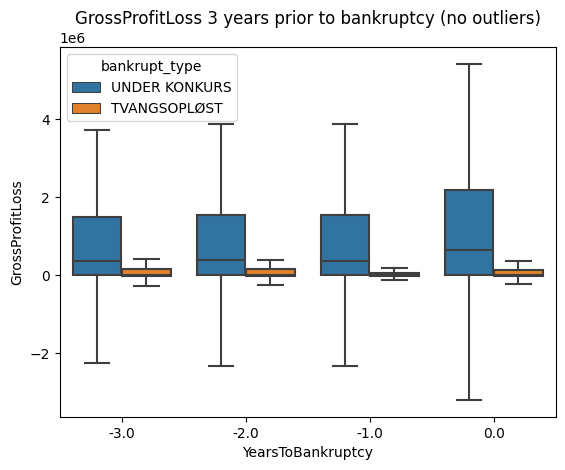

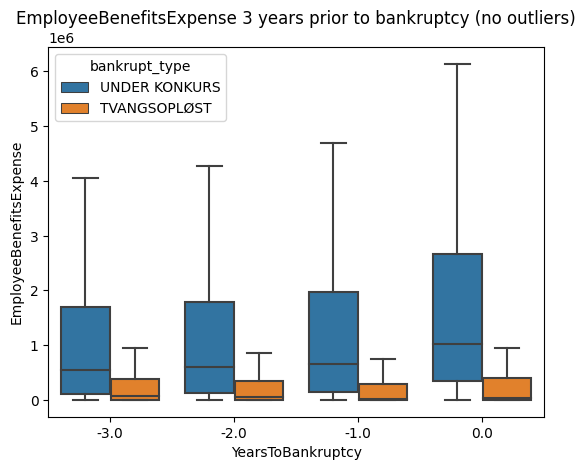

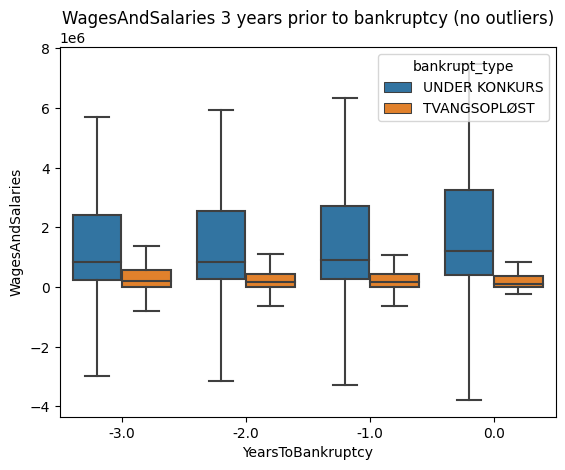

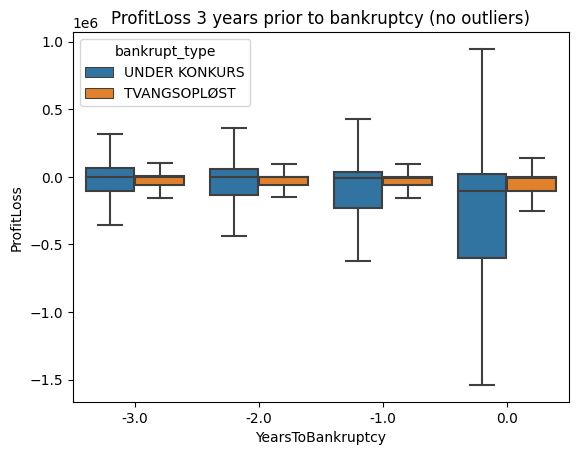

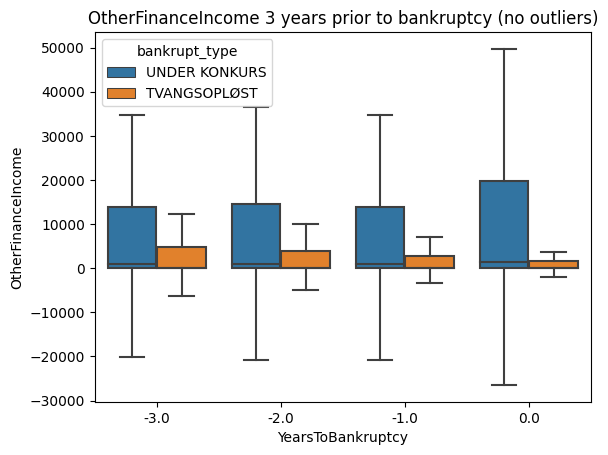

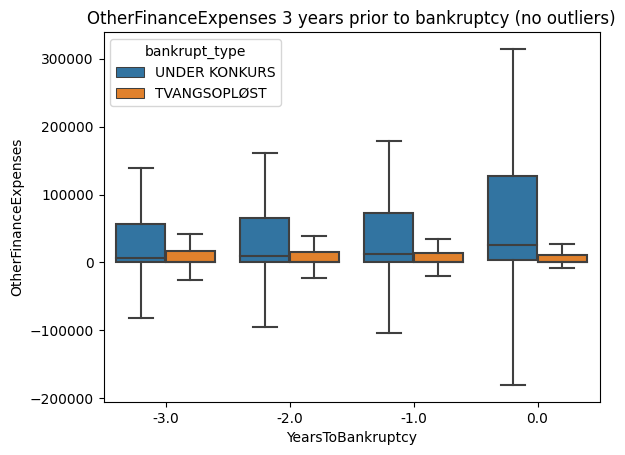

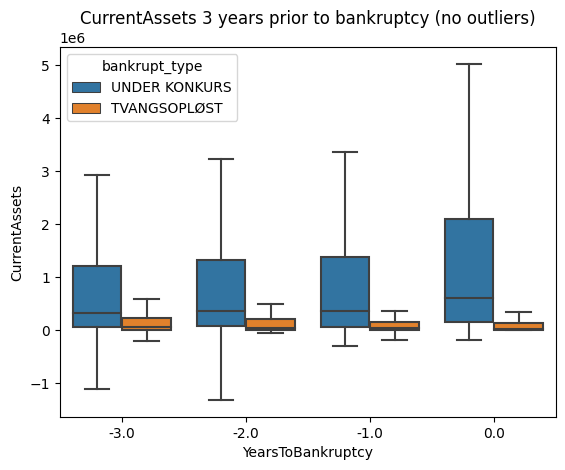

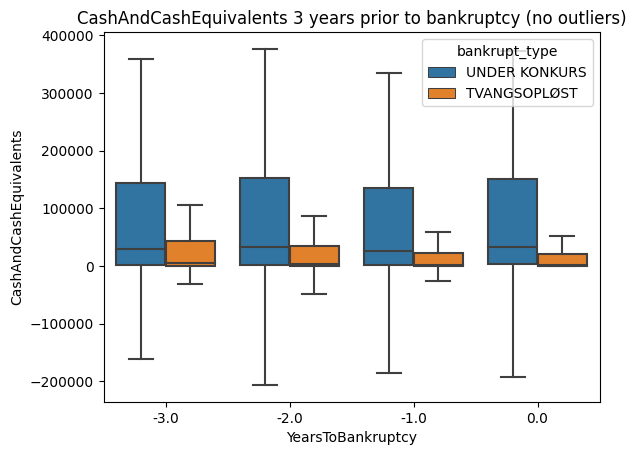

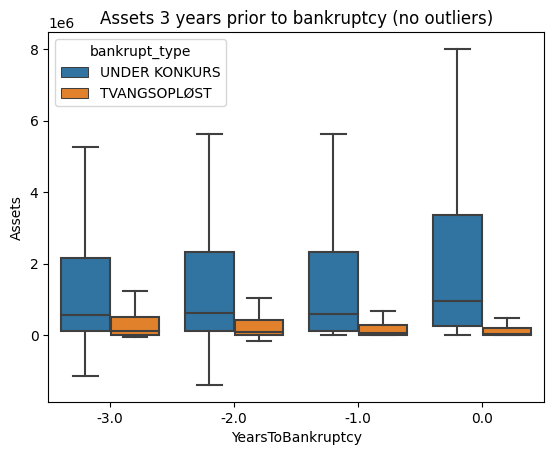

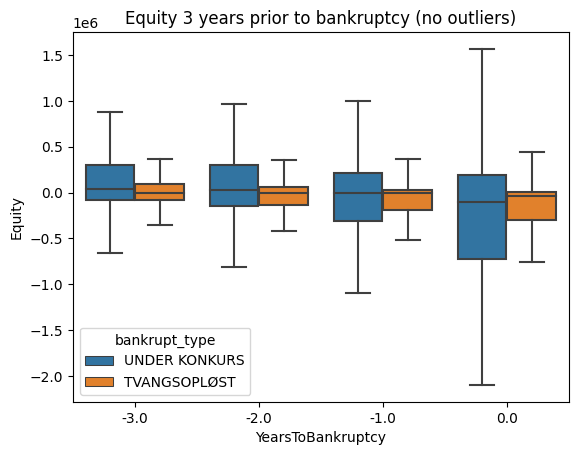

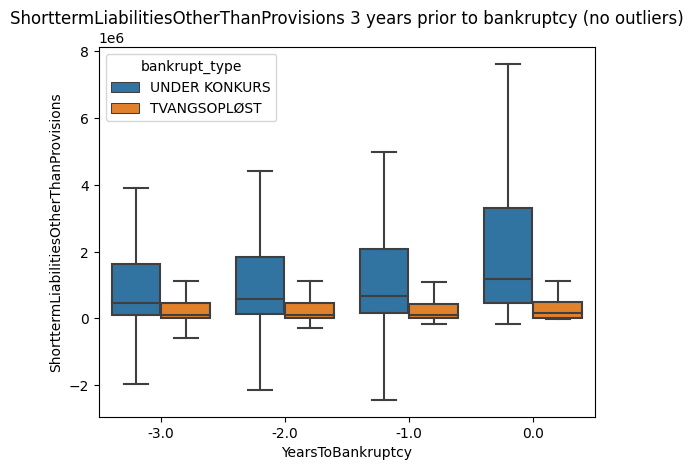

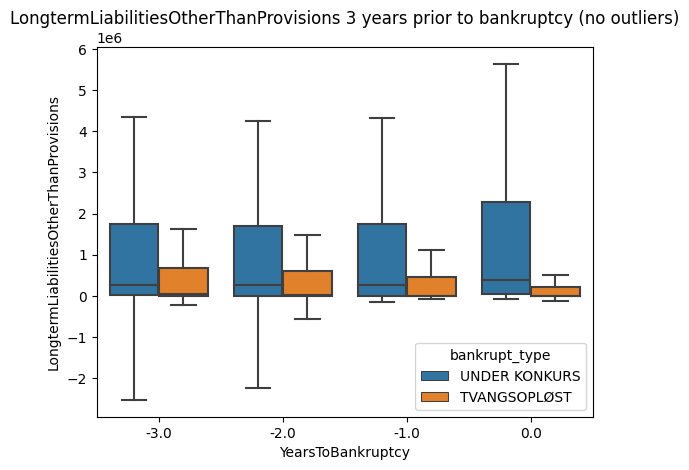

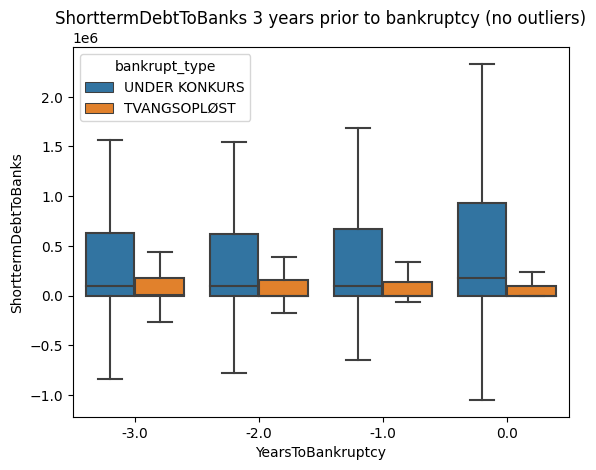

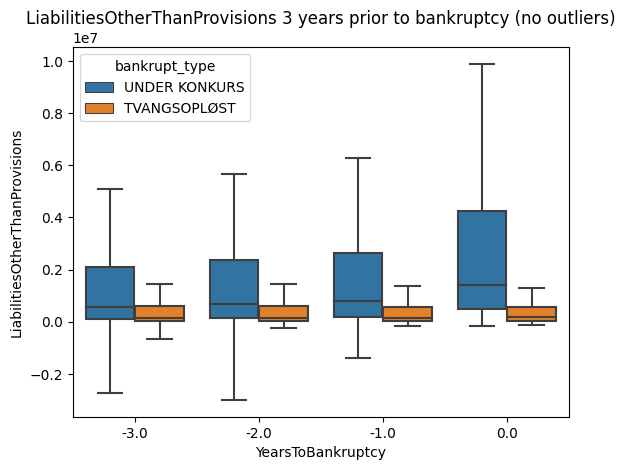

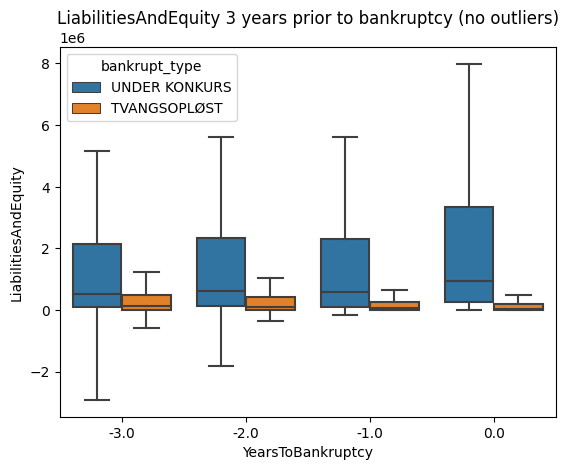

In [9]:
keys = ['GrossProfitLoss', 'EmployeeBenefitsExpense', 'WagesAndSalaries',
       'ProfitLoss', 'OtherFinanceIncome', 'OtherFinanceExpenses',
        'CurrentAssets', 'CashAndCashEquivalents', 'Assets',
       'Equity', 'ShorttermLiabilitiesOtherThanProvisions',
       'LongtermLiabilitiesOtherThanProvisions', 'ShorttermDebtToBanks',
       'LiabilitiesOtherThanProvisions', 'LiabilitiesAndEquity']

for key in keys:
    prior3years = financials_bankrupt.loc[(financials_bankrupt['YearsToBankruptcy'] <= 0) & (financials_bankrupt['YearsToBankruptcy'] >= -3) & (financials_bankrupt['bankrupt_type'] != 'OPLØST EFTER KONKURS')]

    # only view companies with an annual report for all 3 years (
    companies_with_3_reports = prior3years.CVR.value_counts() >= 3
    companies_with_3_reports = companies_with_3_reports[companies_with_3_reports].index
    prior3years = prior3years.loc[prior3years.CVR.isin(companies_with_3_reports)]
    
    # conditioning
    prior3years = prior3years.dropna(subset=key)
    prior3years[key] = prior3years[key].astype(float)

    sns.boxplot(data=prior3years, x="YearsToBankruptcy", y=key, hue='bankrupt_type', hue_order=['UNDER KONKURS', 'TVANGSOPLØST'], showfliers=False)
    plt.title(f"{key} 3 years prior to bankruptcy (no outliers)")
    plt.show()

/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_14554/1822491611.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return diff / x.iloc[0]
/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_14554/1822491611.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  return diff / x.iloc[0]
/Users/nikolaibeckjensen/Company2Vec/myenv2/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/nikolaibeckjensen/Company2Vec/myenv2/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


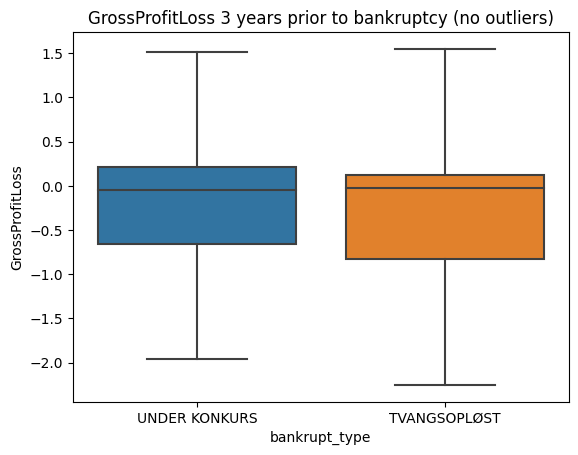

/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_14554/1822491611.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return diff / x.iloc[0]
/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_14554/1822491611.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  return diff / x.iloc[0]


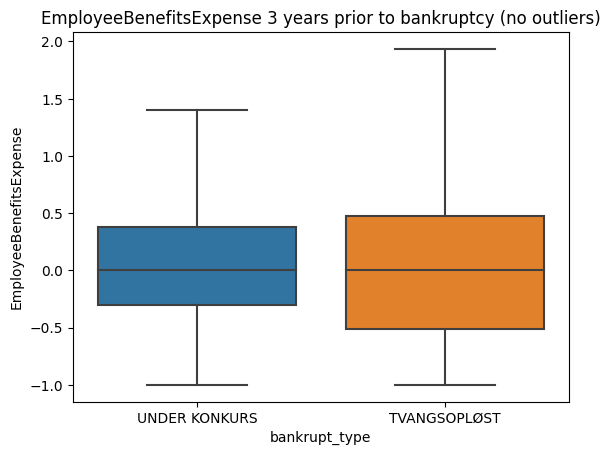

/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_14554/1822491611.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return diff / x.iloc[0]
/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_14554/1822491611.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  return diff / x.iloc[0]
/Users/nikolaibeckjensen/Company2Vec/myenv2/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/nikolaibeckjensen/Company2Vec/myenv2/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


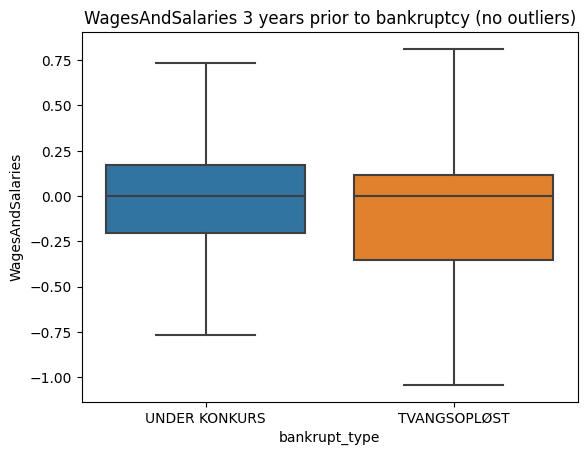

/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_14554/1822491611.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return diff / x.iloc[0]
/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_14554/1822491611.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  return diff / x.iloc[0]
/Users/nikolaibeckjensen/Company2Vec/myenv2/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/nikolaibeckjensen/Company2Vec/myenv2/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


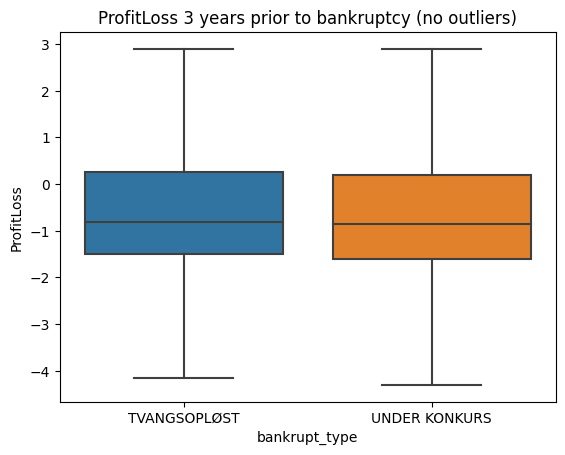

/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_14554/1822491611.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  return diff / x.iloc[0]
/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_14554/1822491611.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return diff / x.iloc[0]
/Users/nikolaibeckjensen/Company2Vec/myenv2/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/nikolaibeckjensen/Company2Vec/myenv2/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


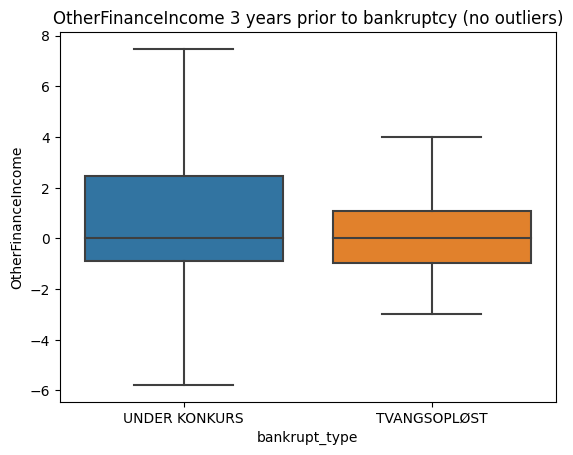

/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_14554/1822491611.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return diff / x.iloc[0]
/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_14554/1822491611.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  return diff / x.iloc[0]
/Users/nikolaibeckjensen/Company2Vec/myenv2/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/nikolaibeckjensen/Company2Vec/myenv2/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


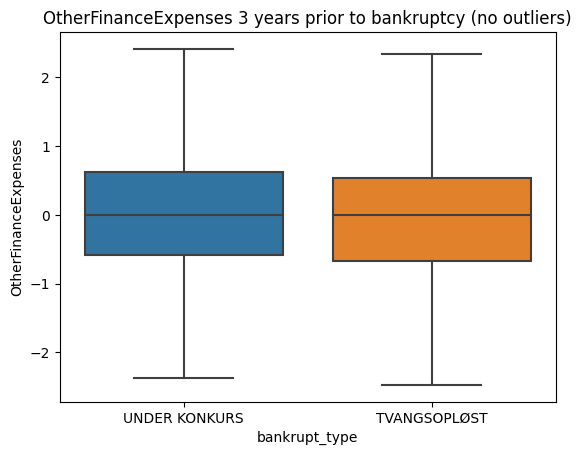

/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_14554/1822491611.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  return diff / x.iloc[0]
/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_14554/1822491611.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return diff / x.iloc[0]
/Users/nikolaibeckjensen/Company2Vec/myenv2/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/nikolaibeckjensen/Company2Vec/myenv2/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


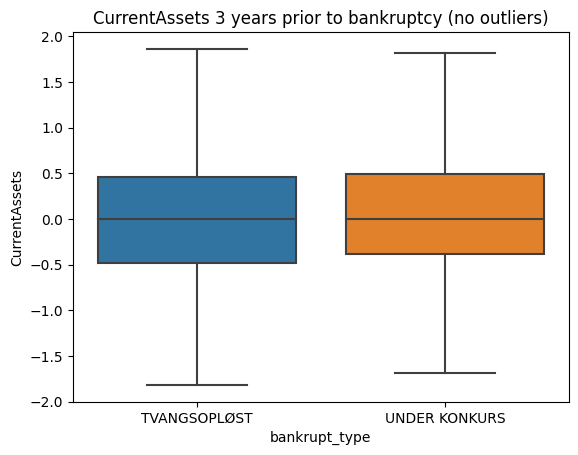

/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_14554/1822491611.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return diff / x.iloc[0]
/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_14554/1822491611.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  return diff / x.iloc[0]
/Users/nikolaibeckjensen/Company2Vec/myenv2/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/nikolaibeckjensen/Company2Vec/myenv2/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


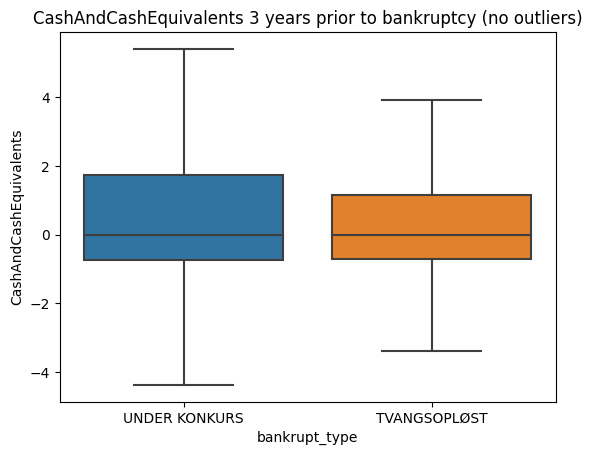

/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_14554/1822491611.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return diff / x.iloc[0]
/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_14554/1822491611.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  return diff / x.iloc[0]


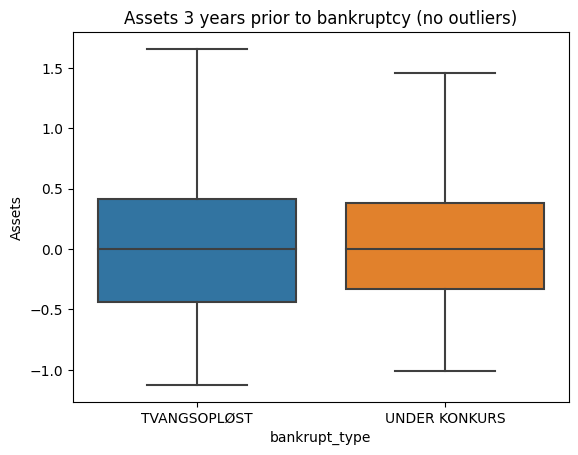

/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_14554/1822491611.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  return diff / x.iloc[0]
/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_14554/1822491611.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return diff / x.iloc[0]
/Users/nikolaibeckjensen/Company2Vec/myenv2/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/nikolaibeckjensen/Company2Vec/myenv2/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


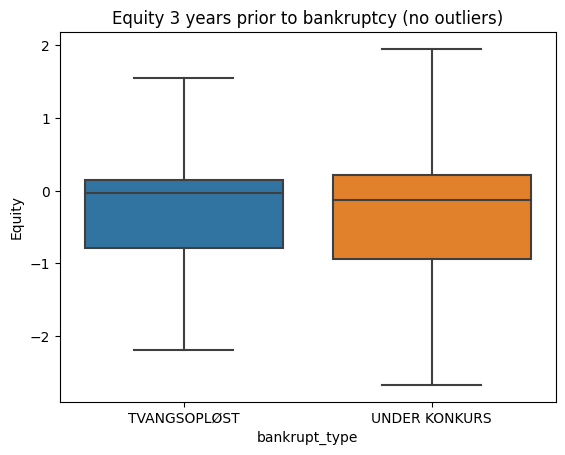

/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_14554/1822491611.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return diff / x.iloc[0]
/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_14554/1822491611.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  return diff / x.iloc[0]
/Users/nikolaibeckjensen/Company2Vec/myenv2/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/nikolaibeckjensen/Company2Vec/myenv2/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


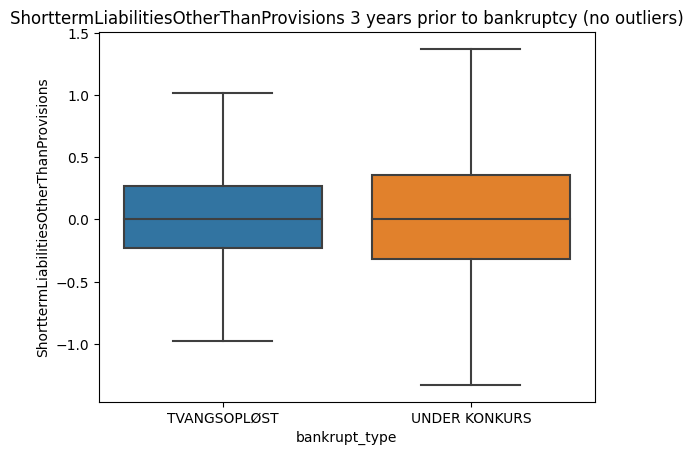

/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_14554/1822491611.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  return diff / x.iloc[0]
/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_14554/1822491611.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return diff / x.iloc[0]
/Users/nikolaibeckjensen/Company2Vec/myenv2/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/nikolaibeckjensen/Company2Vec/myenv2/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


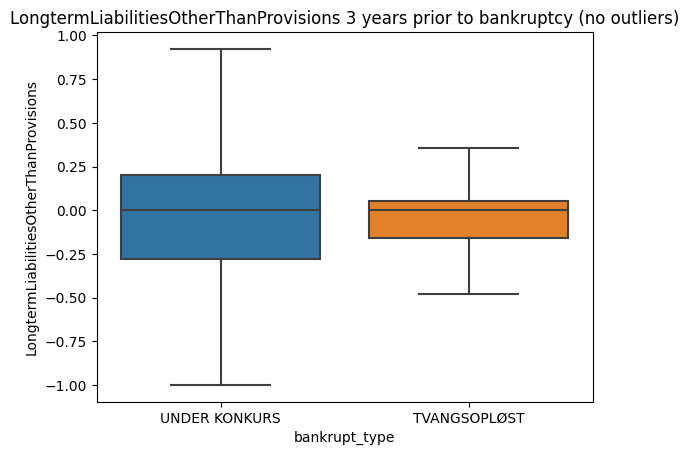

/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_14554/1822491611.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return diff / x.iloc[0]
/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_14554/1822491611.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  return diff / x.iloc[0]
/Users/nikolaibeckjensen/Company2Vec/myenv2/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/nikolaibeckjensen/Company2Vec/myenv2/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


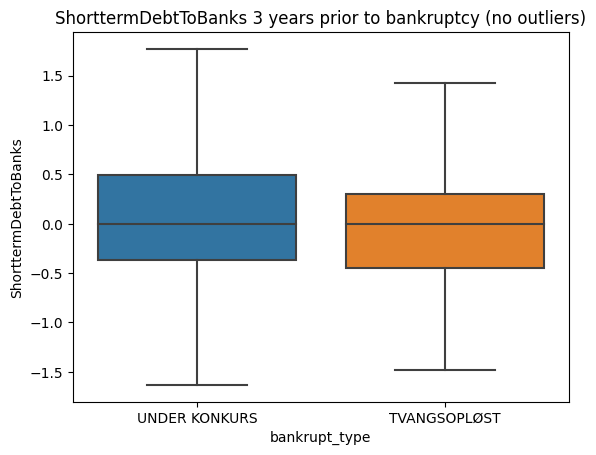

/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_14554/1822491611.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return diff / x.iloc[0]
/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_14554/1822491611.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  return diff / x.iloc[0]
/Users/nikolaibeckjensen/Company2Vec/myenv2/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/nikolaibeckjensen/Company2Vec/myenv2/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


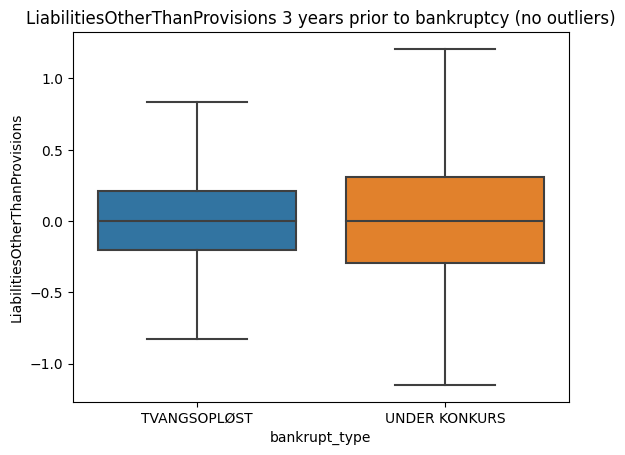

/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_14554/1822491611.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return diff / x.iloc[0]
/var/folders/q1/1q4ncmgd7qz50d0x1z41czmh0000gn/T/ipykernel_14554/1822491611.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  return diff / x.iloc[0]


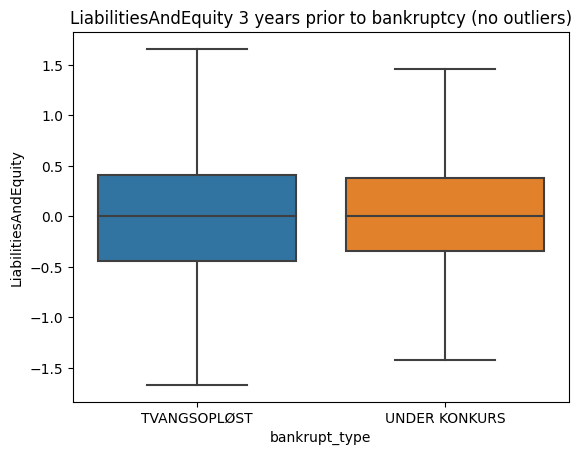

In [10]:
keys = ['GrossProfitLoss', 'EmployeeBenefitsExpense', 'WagesAndSalaries',
       'ProfitLoss', 'OtherFinanceIncome', 'OtherFinanceExpenses',
        'CurrentAssets', 'CashAndCashEquivalents', 'Assets',
       'Equity', 'ShorttermLiabilitiesOtherThanProvisions',
       'LongtermLiabilitiesOtherThanProvisions', 'ShorttermDebtToBanks',
       'LiabilitiesOtherThanProvisions', 'LiabilitiesAndEquity']

for key in keys:
    prior3years = financials_bankrupt.loc[(financials_bankrupt['YearsToBankruptcy'] <= 0) & (financials_bankrupt['YearsToBankruptcy'] >= -3) & (financials_bankrupt['bankrupt_type'] != 'OPLØST EFTER KONKURS')]

    # only view companies with an annual report for all 3 years (
    companies_with_3_reports = prior3years.CVR.value_counts() >= 3
    companies_with_3_reports = companies_with_3_reports[companies_with_3_reports].index
    prior3years = prior3years.loc[prior3years.CVR.isin(companies_with_3_reports)]
    
    # conditioning
    prior3years = prior3years.dropna(subset=key)
    prior3years[key] = prior3years[key].astype(float)
    prior3years = prior3years[["CVR", "bankrupt_type", key]].groupby(["CVR","bankrupt_type"]).agg(percent_change).reset_index()[['CVR', key, 'bankrupt_type']]

    sns.boxplot(data=prior3years, x="bankrupt_type", y=key, hue_order=['UNDER KONKURS', 'TVANGSOPLØST'], showfliers=False)
    plt.title(f"{key} 3 years prior to bankruptcy (no outliers)")
    plt.show()

### **Viz 4:** Correlation between Assets and LiabilitiesAndEquity

In [11]:
financials_all

,CVR,PublicationDate,AuditClass,ReportType,Currency,GrossProfitLoss,EmployeeBenefitsExpense,WagesAndSalaries,ProfitLoss,OtherFinanceIncome,...,Equity,ShorttermLiabilitiesOtherThanProvisions,LongtermLiabilitiesOtherThanProvisions,ShorttermDebtToBanks,LiabilitiesOtherThanProvisions,LiabilitiesAndEquity,PublicationYear,bankrupt_date,bankrupt_type,BankruptYear
0,36458844.0,2021-06-30,"Regnskabsklasse B, mikrovirksomhed",Årsrapport,DKK,0.0,NaN,NaN,25643.0,NaN,...,169953.0,312735.0,NaN,NaN,312735.0,482688.0,2021,NaN,NOT BANKRUPT,NaN
1,39300761.0,2021-06-30,Regnskabsklasse B,Årsrapport,DKK,708949.0,602280.0,NaN,82637.0,NaN,...,178157.0,89515.0,NaN,NaN,89515.0,267672.0,2021,NaN,NOT BANKRUPT,NaN
2,35875220.0,2021-06-30,"Regnskabsklasse B, mikrovirksomhed",Årsrapport,DKK,NaN,870546.0,NaN,-168457.0,4688.0,...,232359.0,490362.0,750850.0,NaN,1241212.0,1790663.0,2021,2022-07-13,UNDER KONKURS,2022.0
3,36969989.0,2021-06-30,"Regnskabsklasse B, mikrovirksomhed",Årsrapport,DKK,246137.0,180966.0,NaN,39621.0,NaN,...,-198144.0,460752.0,NaN,NaN,460752.0,262608.0,2021,2023-07-06,UNDER KONKURS,2023.0
4,36419954.0,2021-06-30,"Regnskabsklasse B, mikrovirksomhed",Årsrapport,DKK,-62314.0,0.0,NaN,-62988.0,NaN,...,-1144788.0,1173087.0,NaN,NaN,1173087.0,28299.0,2021,NaN,NOT BANKRUPT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924912,24258033.0,2020-03-02,Regnskabsklasse B,Årsrapport,DKK,413167.0,NaN,NaN,409612.0,NaN,...,1524.0,5173.0,NaN,NaN,5173.0,6697.0,2020,NaN,NOT BANKRUPT,NaN
2924913,36501502.0,2020-03-02,Regnskabsklasse B,Årsrapport,DKK,705463.0,548012.0,481956.0,65931.0,16151.0,...,418335.0,397352.0,811230.0,186110.0,1208582.0,1628520.0,2020,NaN,NOT BANKRUPT,NaN
2924914,78933917.0,2020-03-02,Regnskabsklasse B,Årsrapport,DKK,1716964.0,1771137.0,1594757.0,-206266.0,5617.0,...,2161433.0,4989808.0,NaN,727415.0,4989808.0,7163766.0,2020,NaN,NOT BANKRUPT,NaN
2924915,37379964.0,2020-03-02,Regnskabsklasse B,Årsrapport,DKK,NaN,NaN,NaN,2316321.0,NaN,...,18736368.0,157805.0,NaN,NaN,157805.0,18894173.0,2020,NaN,NOT BANKRUPT,NaN


In [25]:
financials_all[['Assets', "Equity", 'ProfitLoss', 'LiabilitiesAndEquity', 'LiabilitiesOtherThanProvisions']]

,Assets,Equity,ProfitLoss,LiabilitiesAndEquity,LiabilitiesOtherThanProvisions
0,482688.0,169953.0,25643.0,482688.0,312735.0
1,267672.0,178157.0,82637.0,267672.0,89515.0
2,1790663.0,232359.0,-168457.0,1790663.0,1241212.0
3,262608.0,-198144.0,39621.0,262608.0,460752.0
4,28299.0,-1144788.0,-62988.0,28299.0,1173087.0
...,...,...,...,...,...
2924912,6697.0,1524.0,409612.0,6697.0,5173.0
2924913,1628520.0,418335.0,65931.0,1628520.0,1208582.0
2924914,7163766.0,2161433.0,-206266.0,7163766.0,4989808.0
2924915,18894173.0,18736368.0,2316321.0,18894173.0,157805.0


In [20]:
financials_all.isna().sum()/len(financials_all)

CVR                                        0.000000
PublicationDate                            0.000000
AuditClass                                 0.001679
ReportType                                 0.000384
Currency                                   0.000024
GrossProfitLoss                            0.318798
EmployeeBenefitsExpense                    0.557742
WagesAndSalaries                           0.799383
ProfitLoss                                 0.000000
OtherFinanceIncome                         0.386257
OtherFinanceExpenses                       0.319257
NonCurrentAssets                           1.000000
CurrentAssets                              0.107273
CashAndCashEquivalents                     0.137218
Assets                                     0.006287
Equity                                     0.002416
ShorttermLiabilitiesOtherThanProvisions    0.073405
LongtermLiabilitiesOtherThanProvisions     0.693516
ShorttermDebtToBanks                       0.806483
LiabilitiesO